# 2024 NeurIPS - MyoChallenge

## <center> Welcome to the [**2024 NeurIPS - MyoChallenge:  Physiological Dexterity and Agility in Enhanced Humans**](https://sites.google.com/view/myosuite/myochallenge/myochallenge-2024) </center>



In this tutorial, we will show you how to load the latest MyoSuite baseline.

> Authors: Cheryl Wang (huiyi.wang@mail.mcgill.ca)

Note:


1.   The baseline is trained with PPO - stablebaseline3, you can only load it when using this library.
2.   This baseline method uses a hard-coded method for prosthesis (MPL), and a curriculum based training for the myoArm.





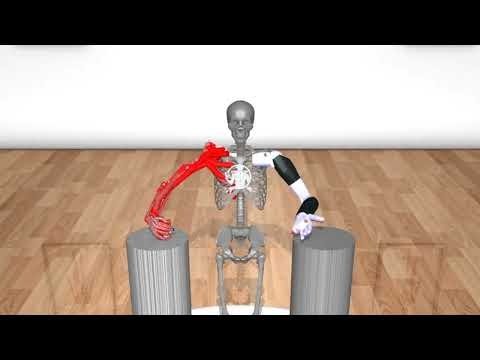

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('332TcmMUABA')

## 1. Setting the environment


In [6]:
!pip install myosuite==2.8.3 --quiet
!pip install "stable-baselines3[extra]" --quiet
!pip install tqdm --quiet
!pip install mujoco==3.1.2 --quiet
!pip install sk-video --quiet
%env MUJOCO_GL=egl
import mujoco

env: MUJOCO_GL=egl


## Define a method to show the rendering inside the Colab

In [7]:
from IPython.display import HTML
from base64 import b64encode

def show_video(video_path, video_width = 400):

  video_file = open(video_path, "r+b").read()

  video_url = f"data:video/mp4;base64,{b64encode(video_file).decode()}"
  return HTML(f"""<video autoplay width={video_width} controls><source src="{video_url}"></video>""")

## All the `MyoSuite` imports needed to run this tutorial

In [8]:
import myosuite
from myosuite.utils import gym
import skvideo.io
import numpy as np
print(f"numpy version: {np.__version__}")
import os
from stable_baselines3 import PPO
from stable_baselines3.common.callbacks import CheckpointCallback
# from tqdm import tqdm_notebook as tqdm
from tqdm.notebook import tqdm

numpy version: 2.1.3


## Download the latest baseline from Google Drive

In [9]:
!pip install wget
import wget

In [6]:
# Importing necessary library
import os

file_id = '168S3oTBmXuf23zDDGMM3tCJ3HBnjYhsM'
download_url = f'https://drive.google.com/uc?export=download&id={file_id}'
target_file = 'baseline.zip'  # Change the file name and extension as needed
# target_file = ROOT_DIR + 'baseline.zip'  # Change the file name and extension as needed

# Using wget to download the file
os.system(f'wget --no-check-certificate "{download_url}" -O {target_file}')

# Check if the file is downloaded
if os.path.exists(target_file):
    print(f'Successfully downloaded {target_file}')
else:
    print('Failed to download the file')

--2024-11-19 00:11:23--  https://drive.google.com/uc?export=download&id=168S3oTBmXuf23zDDGMM3tCJ3HBnjYhsM
Resolving drive.google.com (drive.google.com)... 172.217.161.78, 2404:6800:4004:825::200e
Connecting to drive.google.com (drive.google.com)|172.217.161.78|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=168S3oTBmXuf23zDDGMM3tCJ3HBnjYhsM&export=download [following]
--2024-11-19 00:11:24--  https://drive.usercontent.google.com/download?id=168S3oTBmXuf23zDDGMM3tCJ3HBnjYhsM&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.207.1, 2404:6800:4004:81e::2001
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.207.1|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3167662 (3.0M) [application/octet-stream]
Saving to: ‘baseline.zip’

     0K .......... .......... .......... .......... ..........  1%  652K 5s
 

Successfully downloaded baseline.zip


.... .......... .......... .......... 50% 7.03M 0s
  1550K .......... .......... .......... .......... .......... 51% 9.11M 0s
  1600K .......... .......... .......... .......... .......... 53% 9.29M 0s
  1650K .......... .......... .......... .......... .......... 54% 9.50M 0s
  1700K .......... .......... .......... .......... .......... 56% 8.80M 0s
  1750K .......... .......... .......... .......... .......... 58% 8.91M 0s
  1800K .......... .......... .......... .......... .......... 59% 9.86M 0s
  1850K .......... .......... .......... .......... .......... 61% 9.41M 0s
  1900K .......... .......... .......... .......... .......... 63% 6.92M 0s
  1950K .......... .......... .......... .......... .......... 64% 9.09M 0s
  2000K .......... .......... .......... .......... .......... 66% 7.57M 0s
  2050K .......... .......... .......... .......... .......... 67% 3.54M 0s
  2100K .......... .......... .......... .......... .......... 69% 9.93M 0s
  2150K .......... .......... .......

## Starting the Manipulation Env and Loading the Baseline

**The rendering of the policy would likely take a few minutes. Please be patient :)**



In [10]:
import importlib
from envs import bimanual
importlib.reload(bimanual)
env_name = 'CustomBimanualEnv-v0'
env = gym.make(env_name)

/home/ta747375ki/myochallenge-neuroflex/envs/bimanual.py:498: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  def get_touching_objects(model: mujoco.MjModel, data: mujoco.MjData, id_info: IdInfo):
/home/ta747375ki/myochallenge-neuroflex/envs/bimanual.py:498: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  def get_touching_objects(model: mujoco.MjModel, data: mujoco.MjData, id_info: IdInfo):
/home/ta747375ki/myochallenge-neuroflex/envs/bimanual.py:498: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation

In [14]:
checkpoint_callback = CheckpointCallback(save_freq=100000, save_path='./logs/', name_prefix='ppo_model')
# model = PPO.load('baseline', env)
model = PPO.load("./logs/ppo_model_400000_steps.zip", env, device='cpu')
# model = PPO.load("./agent/model.zip", env, device='cpu')  # Load model on CPU
env.reset()
env.seed(51) #setting a seed for the env
tb_log_name = "ppo_training"
# model.learn(total_timesteps=5000, callback=checkpoint_callback, tb_log_name=tb_log_name)

/home/ta747375ki/myochallenge-neuroflex/venv/lib/python3.10/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.seed to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.seed` for environment variables or `env.get_wrapper_attr('seed')` that will search the reminding wrappers.
  logger.warn(


In [13]:
model.learn(total_timesteps=5000000, callback=checkpoint_callback, tb_log_name=tb_log_name)

/home/ta747375ki/myochallenge-neuroflex/venv/lib/python3.10/site-packages/gymnasium/utils/passive_env_checker.py:159: UserWarning: WARN: The obs returned by the `step()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")


In [15]:
# Ignore specific warning
import warnings
from datetime import datetime
from IPython.display import clear_output, Image, display
import PIL.Image
import numpy as np
import os
import skvideo.io
warnings.filterwarnings("ignore", message=".*tostring.*is deprecated.*")

movie = True  # we want to save a video
frames = []
view = 'front'
obj_qpos_list = []
release_threshold = 0.08
released_step = -1
waiting_step1 = 80
waiting_step2 = 130
waiting_step3 = 170

for _ in range(2):
    ep_rewards = []
    done = False
    obs = env.reset()
    for step in range(300):
        obs_dict = env.obs_dict
        obs = env.obsdict2obsvec(obs_dict, env.obs_keys)[1]
        action, _ = model.predict(obs, deterministic=True)
        # hard-coding the myoHand to release object
        action[30] = 1
        if step > 130:
            action[32:40] = 0
            action[40:49] = 1

        #hard coding the MPL to the desire position, since we know the actuation of the MPL is the last 17 index of action
        action[-17:] = np.array([-0.65001469 , 1.     ,    -0.23187843 , 0.59583695 , 0.92356688, -0.16,
                                -0.28 ,      -0.88   ,     0.25 ,      -0.846   ,   -0.24981132 ,-0.91823529,
                                -0.945  ,    -0.925   ,   -0.929   ,   -0.49    ,   -0.18      ])
        if step > 250:
            action[-17:] = np.array([-0.4199236 ,  1.      ,   -0.9840558 ,  0.35299219,  0.92356688,  0.02095238,
                                        -0.28    ,   -0.88  ,      0.25      , -0.846     , -0.24981132, -0.91823529,
                                        -0.945   ,   -0.925   ,   -0.929    ,  -0.49     ,  -0.918     ])
        if step > 270:
            action[-17:] = np.array([-0.4199236 ,  1.     ,    -0.9840558,   0.35299219 , 0.3910828 ,  0.02095238,
                                        -0.28    ,   -0.88     ,   0.25   ,    -0.846     , -0.24981132 ,-0.91823529,
                                        -0.945    ,  -0.925    ,  -0.929    ,  -0.49  ,     -0.918     ])

        obs, reward, done, info, info_2 = env.step(action)
        if movie:
            geom_1_indices = np.where(env.sim.model.geom_group == 1)
            env.sim.model.geom_rgba[geom_1_indices, 3] = 0
            frame = env.sim.renderer.render_offscreen(width=400, height=400, camera_id=1)
            
            # Convert numpy array to PIL Image
            # pil_image = PIL.Image.fromarray(frame)
            
            # Clear previous output and display new frame
            # obj_qpos_list.append(obs_dict['object_qpos'])
            # clear_output(wait=True)
            # print(f"pos: {obs_dict['object_qpos']}")
            # display(pil_image)
            
            frames.append(frame)

# Clean up
env.close()

# Save video
os.makedirs('videos', exist_ok=True)
current_date = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
skvideo.io.vwrite(f'videos/test_policy_{current_date}.mp4', 
                  np.asarray(frames), 
                  inputdict={'-r': '100'}, 
                  outputdict={"-pix_fmt": "yuv420p"})
show_video(f'videos/test_policy_{current_date}.mp4')

/home/ta747375ki/myochallenge-neuroflex/venv/lib/python3.10/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.obs_dict to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.obs_dict` for environment variables or `env.get_wrapper_attr('obs_dict')` that will search the reminding wrappers.
  logger.warn(
/home/ta747375ki/myochallenge-neuroflex/venv/lib/python3.10/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.obsdict2obsvec to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.obsdict2obsvec` for environment variables or `env.get_wrapper_attr('obsdict2obsvec')` that will search the reminding wrappers.
  logger.warn(
/home/ta747375ki/myochallenge-neuroflex/venv/lib/python3.10/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.obs_keys to get variables from other wrappers is deprecated and will be removed in v1.0, t

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Convert list to numpy array for easier manipulation
obj_qpos_array = np.array(obj_qpos_list)

# Create time steps array
time_steps = np.arange(len(obj_qpos_list))

# Create a figure with subplots
plt.figure(figsize=(15, 10))

# Plot position coordinates (typically first 3 values are x, y, z positions)
plt.subplot(2, 1, 1)
plt.plot(time_steps, obj_qpos_array[:, 0], label='X Position', linewidth=2)
plt.plot(time_steps, obj_qpos_array[:, 1], label='Y Position', linewidth=2)
plt.plot(time_steps, obj_qpos_array[:, 2], label='Z Position', linewidth=2)
plt.grid(True)
plt.legend()
plt.title('Object Position Over Time')
plt.xlabel('Time Steps')
plt.ylabel('Position')

# Plot orientation coordinates (typically next 4 values are quaternion orientation)
plt.subplot(2, 1, 2)
plt.plot(time_steps, obj_qpos_array[:, 3], label='Quat W', linewidth=2)
plt.plot(time_steps, obj_qpos_array[:, 4], label='Quat X', linewidth=2)
plt.plot(time_steps, obj_qpos_array[:, 5], label='Quat Y', linewidth=2)
plt.plot(time_steps, obj_qpos_array[:, 6], label='Quat Z', linewidth=2)
plt.grid(True)
plt.legend()
plt.title('Object Orientation (Quaternion) Over Time')
plt.xlabel('Time Steps')
plt.ylabel('Quaternion Values')

plt.tight_layout()
plt.show()

# Print some statistics
print("\nPosition Statistics:")
print(f"Final position (x, y, z): {obj_qpos_array[-1, :3]}")
print("\nPosition Range:")
print(f"X range: [{obj_qpos_array[:, 0].min():.3f}, {obj_qpos_array[:, 0].max():.3f}]")
print(f"Y range: [{obj_qpos_array[:, 1].min():.3f}, {obj_qpos_array[:, 1].max():.3f}]")
print(f"Z range: [{obj_qpos_array[:, 2].min():.3f}, {obj_qpos_array[:, 2].max():.3f}]")

You will first notice that only in some occasion the myoHand is grasping the object. This is because the baseline is trained upon simple no variation conditions. To fully replicate the baseline behavior, initiate the env with no variations:


```
kwargs={
            'model_path': curr_dir + '/../assets/arm/myoarm_bionic_bimanual.xml',
            'normalize_act': True,
            'frame_skip': 5,
            'obj_scale_change': None
            'obj_mass_change': None
            'obj_friction_change': None
        }
```

!Note: The evaluation env will still have variations

## With all of those set, you can fully replicate the new baseline solution and build on top of it. Happy training!